In [1]:
import os
import sys 
sys.path.append("..")
sys.path.append("../..")

import pandas as pd 
import yellowbrick as yb
import matplotlib as mpl
import matplotlib.pyplot as plt 

%matplotlib notebook

In [2]:
DATA = os.path.normpath("../data/")

def load_data(name):
    path = os.path.join(DATA, name, name + ".csv")
    return pd.read_csv(path)

In [3]:
df = load_data("concrete")
df.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
from sklearn.model_selection import train_test_split as tts

features = ["cement", "slag", "ash", "water", "splast", "coarse", "fine", "age"]
target = "strength"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

<IPython.core.display.Javascript object>


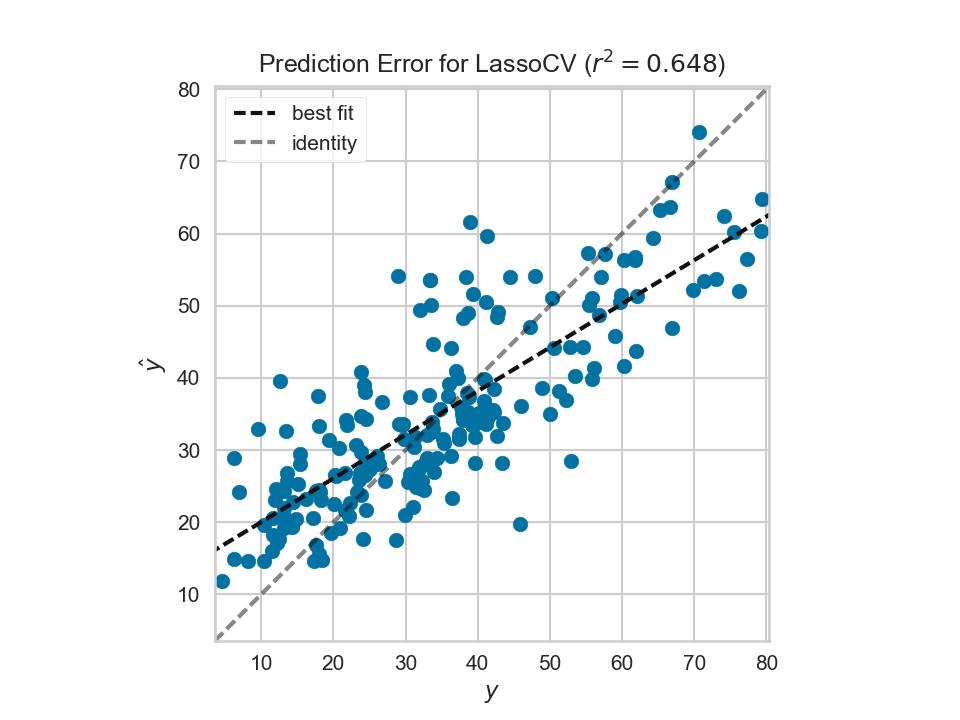

In [5]:
from sklearn.linear_model import LassoCV 
from yellowbrick.regressor import PredictionError

model = PredictionError(LassoCV())
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.poof()